In [132]:
! rm *.c *.o *.so

# Examen Parcial

Indicaciones generales:

* En lo que respecta a `C` no deberá usar punteros, ni arreglos. Tampoco se deberá emplear administración de memoria dinámica, ni de funciones auxiliares de ninguna librería.

* Los puntajes de ítems relacionados con mediciones de tiempo, error relativo y presentación de gráficos solo serán asignados en caso sus funciones estén correctamente implementadas.

* Las funciones implementadas solo deberán tener los argumentos mencionados en su respectivo ítem.

* Los resultados de la función `_slow_` serán las referencias para medir los speedups.

* No se puede emplear ChatGPT, ni ningún modelo de lenguaje.

* Puede emplear apuntes, clases y hacer consultas en foros de internet.

El arco tangente de un número `x` se calcula con la siguiente serie:

$$
arctan(x) = x - \frac{x^{3}}{3} + \frac{x^{5}}{5} - \frac{x^{7}}{7} + \frac{x^{9}}{9} - \cdots
$$

Durante el examen se le solicitará implementar una grupo de funciones basados en esta serie

1. Implementar una función en `python` que calcule el arcotangente de un ángulo `x`. (1.0)

Nombre: `py_arctan_slow`

Argumentos:
* `x` : número
* `n_terms`: cantidad de términos

Resultado: `arctan(x)`

Observación: No debe emplear funciones de módulos auxiliares, ni suyas propias. Todo se debe hacer dentro de la función.

In [133]:
def py_arctan_slow(x, n_terms):
    suma=0
    for i in range(1, n_terms+1):
        potencia= pow(x, (2*i)-1)* pow(-1,i+1)
        denominador= (2*i)-1
        suma= suma+ (potencia/denominador)
    return suma

2. Implementar una función en `python` que calcule el arcotangente de un ángulo `x`. (2.0)

Nombre: `py_arctan_fast`

Argumentos:
* `x` : número
* `n_terms`: cantidad de términos

Resultado: `arctan(x)`

Observación: No debe emplear funciones de módulos auxiliares, ni suyas propias. Se le sugiere deducir el término $t_{n}$ en función del término $t_{n-1}$

In [134]:
def py_arctan_fast(x, n_terms):
   suma=0
   tn_1= x
   
   for i in range (1, n_terms+1):
        tn = pow(-1,i+1)*((pow(tn_1, (2 * i) - 1 ))/( 2 * i - 1 ))
        suma = suma+ tn
        tn_1 = tn #actualizamos termino
   return suma 

3. En una celda mágica implementar dos versiones en `C` para la función `py_arctan_fast`. Una versión será para ángulos de tipo `double` y otra versión será para ángulos de tipo `long double`. (3.0)

In [135]:
%%file c_arctan.c
#include <math.h>


double c_arctan_double(double x, int n_terms){
    double suma, tn, tn_1;
    int i;
    suma=0.0;
    tn_1=x;
    for(i=1; i<= n_terms; i++){
        tn = pow( -1, i + 1 ) * ((pow( tn_1, (2 * i) - 1 ))/( 2 * i - 1 ));
        suma = suma + tn;
        tn_1 = tn;
    }
    return suma;
}

long double c_arctan_long(long double x, int n_terms){
    long double suma, tn, tn_1;
    int i;
    suma=0.0;
    tn_1=x;
    for(i=1; i<= n_terms; i++){
        tn = pow( -1, i + 1 ) * ((pow( tn_1, (2 * i) - 1 ))/( 2 * i - 1 ));
        suma = suma + tn;
        tn_1 = tn;
    }
    return suma;
}

Writing c_arctan.c


4. Crear el *object file* y la *shared library* (0.25)

In [136]:
! gcc -c c_arctan.c -lm

In [137]:
! gcc -shared c_arctan.o -o c_arctan.so

5. Hacer el enlace con python mediante `ctypes` (0.25)

In [138]:
import ctypes

In [139]:
def ctypes_c_arctan():
    lib= ctypes.CDLL('./c_arctan.so')
    lib.c_arctan_double.argtypes= [ctypes.c_double, ctypes.c_int]
    lib.c_arctan_double.restype=ctypes.c_double

    lib.c_arctan_long.argtypes=[ctypes.c_longdouble, ctypes.c_int]
    lib.c_arctan_long.restype= ctypes.c_longdouble

    return lib.c_arctan_long, lib.c_arctan_double

6. Hacer una instancia de las dos funciones en C llamando a la función del ítem 5 (0.25)

In [140]:
c_arctan_double, c_arctan_longdouble = ctypes_c_arctan()

7. Presentar una gráfica para las cuatro funciones empleando solo 1 término. Reemplace sus funciones donde se indica. (0.25)

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
xs = np.linspace(-1.00, 1.00, 1000)

In [143]:
yslow = np.asarray([py_arctan_slow(x, 1) for x in xs])
yfast = np.asarray([py_arctan_fast(x, 1) for x in xs])
yfast_cd = np.asarray([c_arctan_double(x, 1) for x in xs])
yfast_cld = np.asarray([c_arctan_longdouble(x, 1) for x in xs])

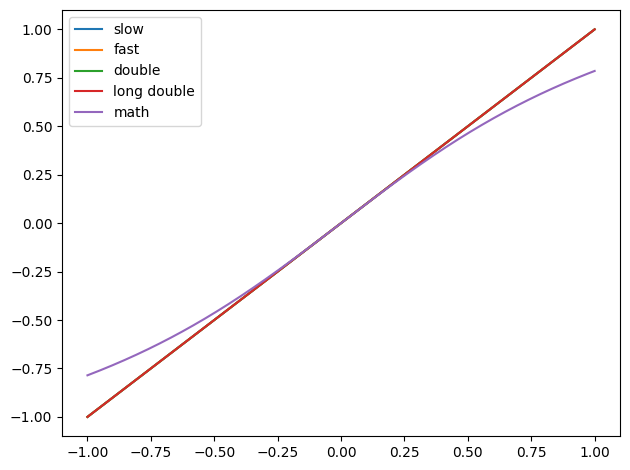

In [144]:
plt.plot(xs,yslow, label='slow')
plt.plot(xs,yfast, label='fast')
plt.plot(xs,yfast_cd, label='double')
plt.plot(xs,yfast_cld, label='long double')
plt.plot(xs,np.arctan(xs), label='math')
plt.legend()
plt.tight_layout()

8. Implementar una función en `python` que calcula el error relativo de una función `f` sobre un grupo de números `xs` con `n_terms` términos (1.0)

In [145]:
def error_relativo(f, xs, n_terms):
  return abs(np.linalg.norm(np.asarray([f(x,n_terms) for x in xs]))-np.linalg.norm(np.asarray([np.arctan(x) for x in xs])))/np.linalg.norm(np.asarray([np.arctan(xs) for x in xs]))
 # 1ERA FORMA
   #approx_norm = np.linalg.norm(np.asarray([f(x, n_terms) for x in xs]))
   #atan_norm = np.linalg.norm(np.asarray([np.arctan(x) for x in xs]))
   #return abs(approx_norm - atan_norm) / atan_norm

#2DA FORMA
   #errores_relativos = np.zeros(len(xs))

   #for i, x in enumerate(xs):
        #valor_exacto = f(x)
        #aproximacion = 0.0

        #for j in range(n_terms):
            #aproximacion += f(x, j)

        #if valor_exacto != 0:
            #errores_relativos[i] = np.abs((aproximacion - valor_exacto) / valor_exacto)
        #else:
            #errores_relativos[i] = np.abs(aproximacion - valor_exacto)

   #return errores_relativos




9. Presentar una gráfica del error relativo para las cuatro funciones. Reemplace sus funciones donde se indica. (0.25)

In [146]:
N = 200
err_slow = [error_relativo(py_arctan_slow, xs, n) for n in range(10, N, 10)]
err_fast = [error_relativo(py_arctan_fast, xs, n) for n in range(10, N, 10)]
err_cd = [error_relativo(c_arctan_double, xs, n) for n in range(10, N, 10)]
err_cld = [error_relativo(c_arctan_longdouble, xs, n) for n in range(10, N, 10)]

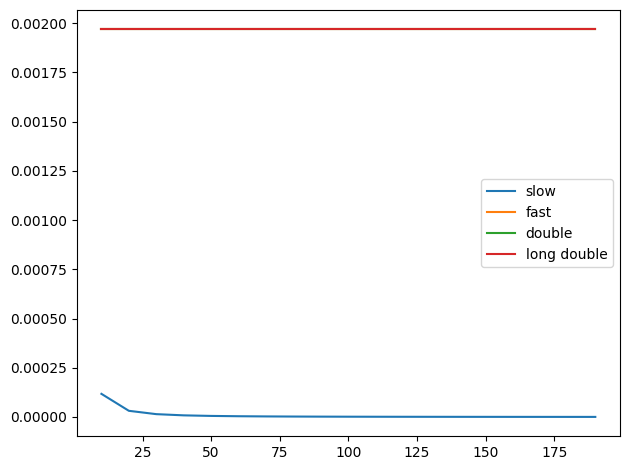

In [147]:
plt.plot(range(10, N, 10), err_slow, label='slow')
plt.plot(range(10, N, 10), err_fast, label='fast')
plt.plot(range(10, N, 10), err_cd, label='double')
plt.plot(range(10, N, 10), err_cld, label='long double')
plt.legend()
plt.tight_layout()

10. Realice la medición de tiempo con sus funciones (1.0)

In [148]:
def arctan(f, n_terms, xs):
    return np.asarray([f(x, n_terms) for x in xs])

In [149]:
import time
import statistics

In [150]:
t_py_slow = []
t_py_fast = []
t_c_double = []
t_c_longdouble = []
xs = np.linspace(-1.00, 1.00, 1000)
Ns = range(10, N, 10)

for n in Ns:

    t_py_slowi = []
    t_py_fasti = []
    t_c_doublei = []
    t_c_longdoublei = []
    
    for _ in range(20):

        tic = time.perf_counter()
        arctan(py_arctan_slow, n, xs)
        toc = time.perf_counter()
        t_py_slowi.append(toc -tic)

        tic = time.perf_counter()
        arctan(py_arctan_fast, n, xs)
        toc = time.perf_counter()
        t_py_fasti.append(toc -tic)

        tic = time.perf_counter()
        arctan(c_arctan_double, n, xs)
        toc = time.perf_counter()
        t_c_doublei.append(toc -tic)

        tic = time.perf_counter()
        arctan(c_arctan_double, n, xs)
        toc = time.perf_counter()
        t_c_longdoublei.append(toc -tic)

    t_py_slow.append(statistics.median(t_py_slowi))
    t_py_fast.append(statistics.median(t_py_fasti))
    t_c_double.append(statistics.median(t_c_doublei))
    t_c_longdouble.append(statistics.median(t_c_longdoublei))

11. Presentar la gráfica de tiempos para los cuatro casos (0.25)

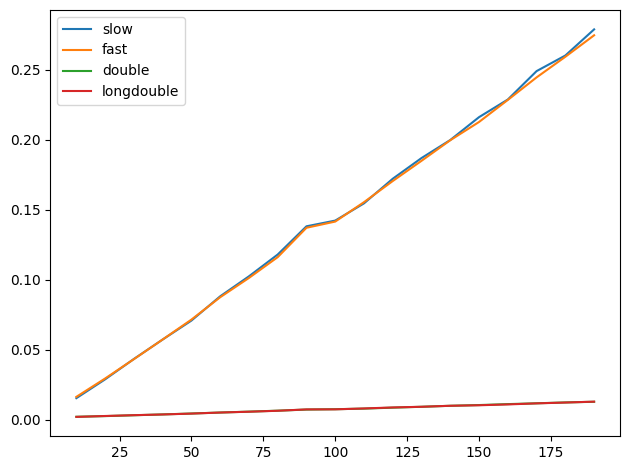

In [151]:
plt.plot(Ns, t_py_slow, label='slow')
plt.plot(Ns, t_py_fast, label='fast')
plt.plot(Ns, t_c_double, label='double')
plt.plot(Ns, t_c_longdouble, label='longdouble')
plt.legend()
plt.tight_layout()

12. Presentar la gráfica de speedup de `python fast` respecto de `python slow` (0.25)

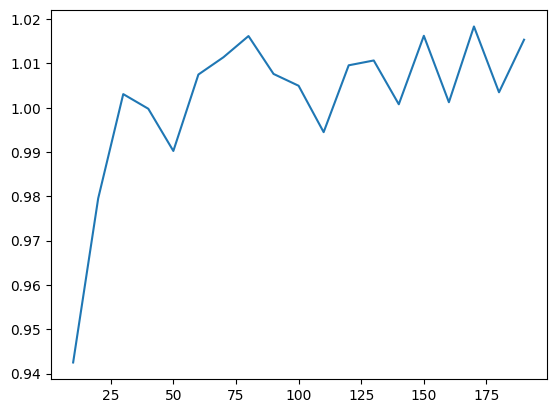

In [152]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_py_fast), label='fast')

13. Presentar la gráfica de speedup de `c double` y `c long double` respecto de `python slow` (0.25)

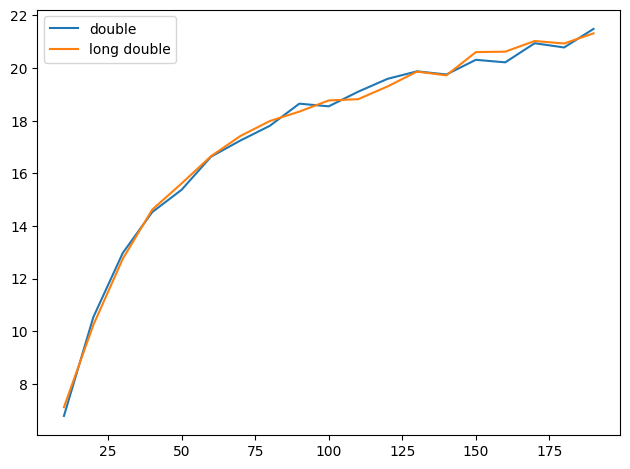

In [153]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_double), label='double')
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_longdouble), label='long double')
plt.legend()
plt.tight_layout()